In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms

from utils import prepare_cifar10_data, train_model, evaluate_model
from models import Autoencoder, compute_loss_autoencoder

In [2]:
batch_size = 64
learning_rate = 1e-3
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [3]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

autoencoder_model = Autoencoder().to(device)
optimizer = optim.Adam(autoencoder_model.parameters(), lr=learning_rate)


trained_model = train_model(
    model=autoencoder_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_autoencoder,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 1.0869
val Loss: 0.9755
Epoch 2/20
train Loss: 0.9623
val Loss: 0.9497
Epoch 3/20
train Loss: 0.9482
val Loss: 0.9410
Epoch 4/20
train Loss: 0.9417
val Loss: 0.9367
Epoch 5/20
train Loss: 0.9382
val Loss: 0.9333
Epoch 6/20
train Loss: 0.9346
val Loss: 0.9295
Epoch 7/20
train Loss: 0.9316
val Loss: 0.9274
Epoch 8/20
train Loss: 0.9301
val Loss: 0.9265
Epoch 9/20
train Loss: 0.9290
val Loss: 0.9255
Epoch 10/20
train Loss: 0.9281
val Loss: 0.9244
Epoch 11/20
train Loss: 0.9270
val Loss: 0.9233
Epoch 12/20
train Loss: 0.9258
val Loss: 0.9220
Epoch 13/20
train Loss: 0.9246
val Loss: 0.9215
Epoch 14/20
train Loss: 0.9236
val Loss: 0.9199
Epoch 15/20
train Loss: 0.9228
val Loss: 0.9192
Epoch 16/20
train Loss: 0.9221
val Loss: 0.9188
Epoch 17/20
train Loss: 0.9215
val Loss: 0.9187
Epoch 18/20
train Loss: 0.9209
val Loss: 0.9176
Epoch 19/20
train Loss: 0.9204
val Loss: 0.9170
Epoch 20/20
train Loss: 0.9200
val Loss: 0.9165


In [4]:
test_loss = evaluate_model(
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_autoencoder,
    device=device
)

Test Loss: 0.0142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


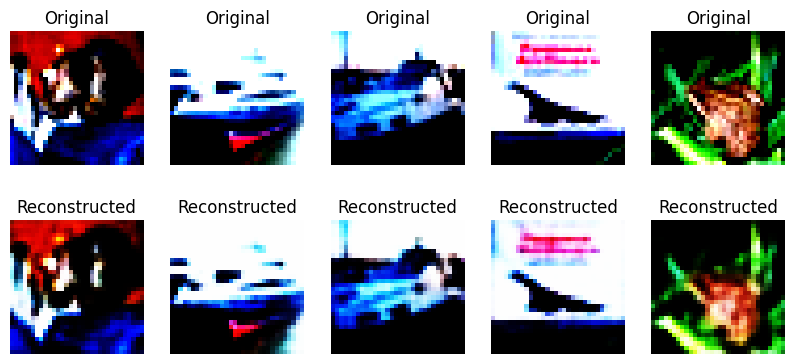

In [5]:
import matplotlib.pyplot as plt 

trained_model.eval()  # Set model to evaluation mode

# Visualization
dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed = trained_model(images)

images = images.cpu()
reconstructed = reconstructed.cpu()
n_visualize = 5

plt.figure(figsize=(10, 4.5))
for i in range(n_visualize):
    # Original images
    ax = plt.subplot(2, n_visualize, i + 1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n_visualize, i + 1 + n_visualize)
    plt.imshow(reconstructed[i].permute(1, 2, 0))
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()